## Live updates for image of zebrafish neural activity

In [1]:
import zmq
import sys
import math
import time
import subprocess
import numpy as np
import matplotlib.pylab as plt
import pyarrow.plasma as plasma

from improv.store import Limbo
from IPython.display import clear_output

Before running the next cell, the server needs to be started as well. In another terminal window besides for the one needed for this Jupyter Notebook, run `python acq_zmq.py`.

After seeing the message "the store has started" in the terminal, run the next cell!

Object ObjectID(546ead88778dfc2018340816c4bf3e257ee08d1b) cannot be found.


TypeError: __init__() missing 1 required positional argument: 'obj_id_or_name'

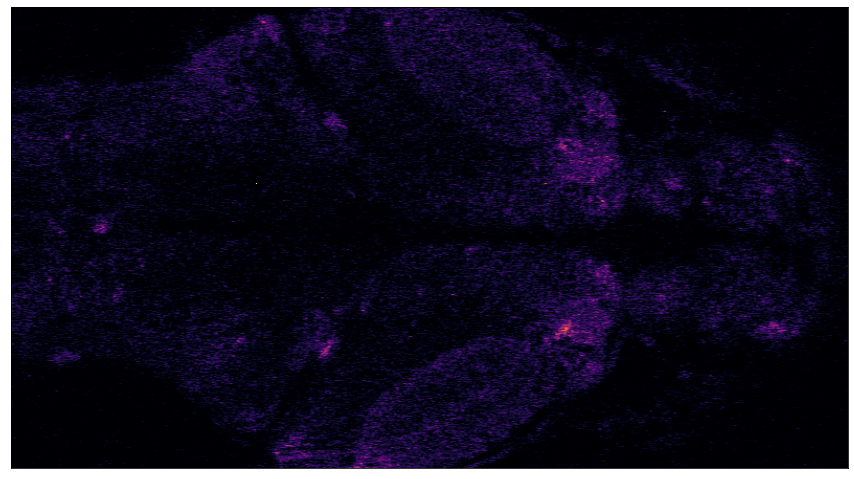

In [97]:
# connecting to the store and setting up the socket for ZMQ
lmb = Limbo(store_loc="/tmp/store")
context = zmq.Context()
socket = context.socket(zmq.SUB)
socket.connect("tcp://127.0.0.1:5555")
socket.setsockopt_string(zmq.SUBSCRIBE, '')

# configuration settings for plotting
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1) 
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
clear_output() #wait=True

# prepping to start receiving messages
timing_loop = []
n=1
print("Waiting to receive message from zmq ...")

# loop to run live image updates
while True:
    t1 = time.time()
    clear_output(wait=True)
    message = socket.recv()
    object_id = plasma.ObjectID(message)
    data = lmb.getID(object_id)
    
    ax.cla()
    ax.imshow(data, cmap='inferno')
    display(fig)    

    loop_time = time.time() - t1
    timing_loop.append(loop_time)
    n=n+1

## Downloading image and creating plots for timing

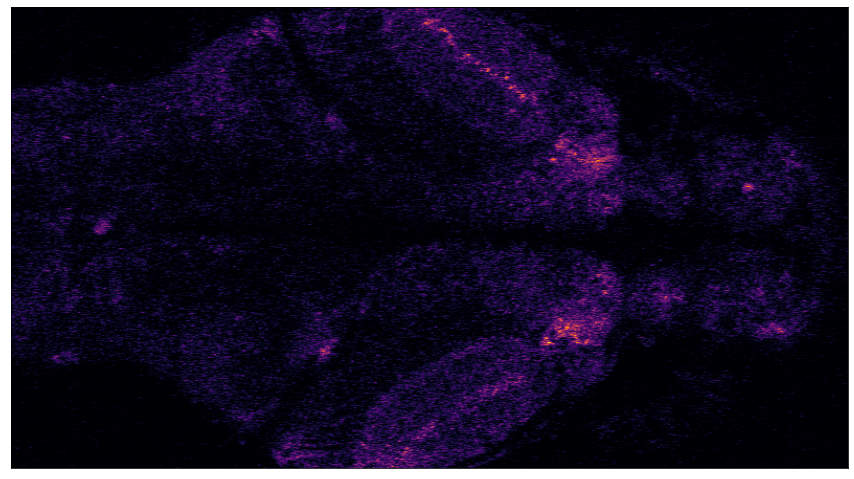

In [92]:
# saving the last image to a png file (to be used on poster)

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,1,1) 
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.imshow(data, cmap='inferno')
fig.savefig('zebrafish_brain_image2.png', dpi=300)

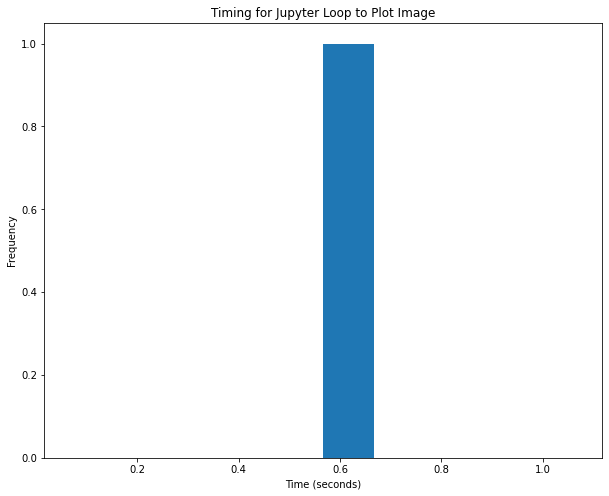

In [98]:
# histogram for loop timing

timing_loop2 = timing_loop.pop(3330) # removing outlier due to computer sleeping

fig1, ax1 = plt.subplots()

ax1.hist(timing_loop2)
plt.title('Timing for Jupyter Loop to Plot Image')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
fig1.set_size_inches(10, 8)


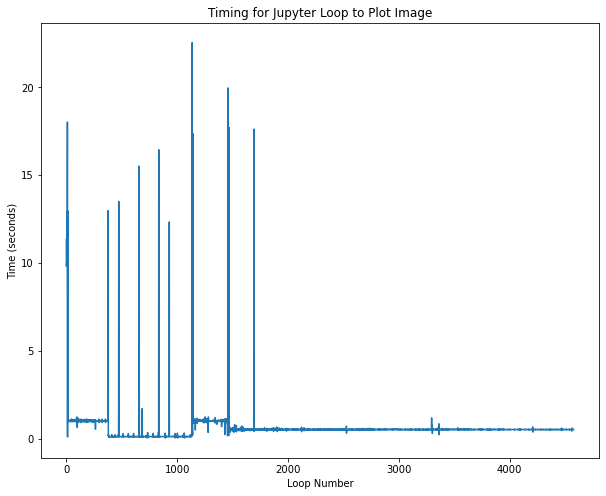

In [85]:
# loop timing over each iteration

timing_loop.pop(3330) # removing outlier due to computer sleeping
a = np.arange(len(timing_loop))

fig2, ax2 = plt.subplots()

plt.title('Timing for Jupyter Loop to Plot Image')
plt.xlabel('Loop Number')
plt.ylabel('Time (seconds)')
fig2.set_size_inches(10, 8)

ax2.plot(a, timing_loop)

In [44]:
# example for timing the different parts of the loop

lmb = Limbo(store_loc="/tmp/store")
context = zmq.Context()
socket = context.socket(zmq.SUB)
socket.connect("tcp://127.0.0.1:5555")
socket.setsockopt_string(zmq.SUBSCRIBE, '')

timestore=[]
timeconvertid=[]
timegetzmq=[]
timeplot=[]

fig, ax = plt.subplots()

n=1
print("Waiting to receive message from zmq ...")

# trying to update in loop as data comes in
while True:
    t11 = time.time()
    message = socket.recv()
    t12 = time.time() - t11
    
    t21 = time.time()
    object_id = plasma.ObjectID(message)
    t22 = time.time() - t21
    
    t31 = time.time()
    data = lmb.getID(object_id)
    t32 = time.time() - t31
    
    t41 = time.time()
    plt.imshow(data, cmap='inferno')
    plt.xlabel(message)
    plt.show()
    t42 = time.time() - t41
    
    timestore.append(t12)
    timeconvertid.append(t22)
    timegetzmq.append(t32)
    timeplot.append(t42)
    
    n=n+1
    clear_output(wait=True)

KeyboardInterrupt: 

<Figure size 1080x720 with 0 Axes>

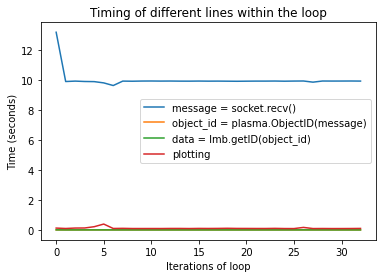

<Figure size 144x144 with 0 Axes>

In [74]:
# plotting the timing for various code lines of the main loop

w = np.arange(len(timestore))
x = np.arange(len(timeconvertid))
y = np.arange(len(timegetzmq))
z = np.arange(len(timeplot))

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

fig = plt.figure()

plt.plot(w, timestore, label="message = socket.recv()")
plt.plot(x, timeconvertid, label="object_id = plasma.ObjectID(message)")
plt.plot(y, timegetzmq, label="data = lmb.getID(object_id)")
plt.plot(z, timeplot, label = "plotting")
plt.xlabel('Iterations of loop')
plt.ylabel('Time (seconds)')
plt.title('Timing of different lines within the loop')
plt.legend() #loc='center left', bbox_to_anchor=(1, 0.5)
plt.figure(figsize=(2, 2))
fig.savefig('timing_fxns_test.jpg', dpi=200)
# plt.show()
# plt.close()